# IPL data analysis over the years

In [1]:
#import statements
import numpy as np
import pandas as pd
import matplotlib as mat
import seaborn as sns

In [2]:
data = pd.read_csv("E:\\PythonData\\IPL.csv")
print(data.shape)
data.head()

#clean data
data["batting_team"] = np.where(data['batting_team'] == 'Rising Pune Supergiants', 'Rising Pune Supergiant', data['batting_team']) 
data["bowling_team"] = np.where(data['bowling_team'] == 'Rising Pune Supergiants', 'Rising Pune Supergiant', data['bowling_team']) 

df = data
df

(164750, 21)


match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
5              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
6              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
7              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
8              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
9              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
10             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
11             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
12             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
13             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
14             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
15             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
16             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
17             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
18             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
19             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
20             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
21             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
22             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
23             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
24             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
25             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
26             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
27             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
28             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
29             1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
164720      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164721      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164722      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164723      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164724      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164725      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164726      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164727      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164728      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164729      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164730      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164731      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164732      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164733      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164734      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164735      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164736      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164737      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164738      7953       2  Chennai Super Kings          Sunrisers Hyderabad   
164739      7953       2  Chen

# Batsmen with most runs (Top 10)

     Batsman Name  Total Runs
0        SK Raina        5014
1         V Kohli        4962
2       RG Sharma        4504
3       G Gambhir        4223
4      RV Uthappa        4144
5        S Dhawan        4090
6        MS Dhoni        4041
7        CH Gayle        4037
8       DA Warner        4014
9  AB de Villiers        3974


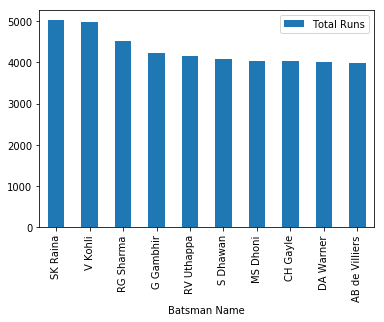

In [6]:
df = data.groupby("batsman").batsman_runs.sum().reset_index()
df = df.rename(columns = {'batsman_runs':'Total Runs', 'batsman':'Batsman Name'}).sort_values(by=['Total Runs'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df = df.head(10)
print(df)
df.plot.bar(x ='Batsman Name', y = 'Total Runs')

# Bowlers with most  wickets (Top 10)

       Bowler Name  Total Wickets
0       SL Malinga            154
1         A Mishra            146
2        PP Chawla            139
3         DJ Bravo            136
4  Harbhajan Singh            134
5          B Kumar            120
6        SP Narine            112
7         UT Yadav            111
8         R Ashwin            110
9          A Nehra            106


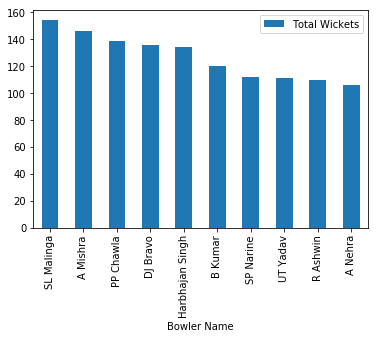

In [8]:
df = data[data['dismissal_kind'] != 'run out']
df = df.groupby("bowler").player_dismissed.count().reset_index()
df = df.rename(columns = {'player_dismissed':'Total Wickets', 'bowler':'Bowler Name'}).sort_values(by=['Total Wickets'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df = df.head(10)
print(df)
df.plot.bar(x ='Bowler Name', y = 'Total Wickets')

# Maximum sixes hit by player (Top 10)

     Batsman Name  Sixes
0        CH Gayle    293
1  AB de Villiers    188
2        SK Raina    186
3        MS Dhoni    186
4       RG Sharma    185
5         V Kohli    178
6       YK Pathan    160
7       DA Warner    160
8       SR Watson    157
9      KA Pollard    155


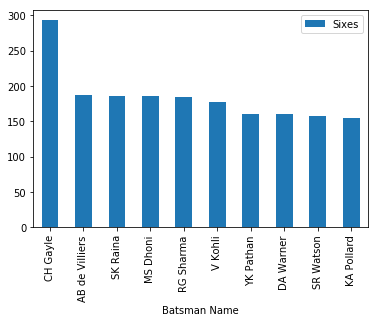

In [13]:
df = data.loc[data['batsman_runs'] == 6]
df = df.groupby("batsman")['batsman_runs'].count().reset_index()
df = df.rename(columns = {'batsman_runs':'Sixes', 'batsman':'Batsman Name'}).sort_values(by=['Sixes'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df = df.head(10)
print(df)
df.plot.bar(x ='Batsman Name', y = 'Sixes')

# Maximum fours hit by player (Top 10)

  Batsman Name  Fours
0    G Gambhir    492
1     S Dhawan    461
2     SK Raina    448
3      V Kohli    436
4   RV Uthappa    408
5    DA Warner    401
6    RG Sharma    379
7    AM Rahane    360
8   KD Karthik    336
9     V Sehwag    334


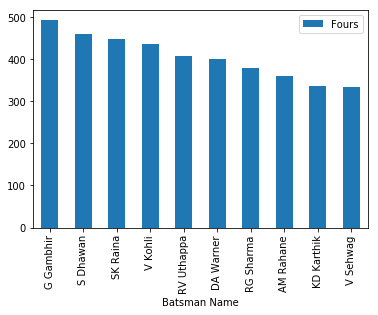

In [16]:
df = data.loc[data['batsman_runs'] == 4]
df = df.groupby("batsman")['batsman_runs'].count().reset_index()
df = df.rename(columns = {'batsman_runs':'Fours', 'batsman':'Batsman Name'}).sort_values(by=['Fours'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df = df.head(10)
print(df)
df.plot.bar(x = 'Batsman Name', y = 'Fours')

# Maximum sixes by a player in a single match (Top 10)

In [23]:
df = data.loc[data['batsman_runs'] == 6]
df = df.groupby(['batsman', 'match_id', 'inning'])['batsman_runs'].count().reset_index()
df = df.rename(columns = {'batsman_runs':'Sixes', 'batsman':'Batsman Name', 'match_id':'Match Number', 'inning':'Innings'}).sort_values(by=['Sixes'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df['Opposition Name'] = ''
df = df.head(10)

for i in range(len(df)):
    OppositionName = data.loc[(data['match_id'] == df.loc[i, "Match Number"]) & (data['inning'] == df.loc[i, "Innings"])]
    df.loc[i, 'Opposition Name'] = OppositionName["bowling_team"].unique()[0]
    
df = df.head(10)
df
#df.plot.bar( x = 'Batsman Name', y = 'Sixes')

#df.groupby(['batsman', 'match_id'])['batsman_runs'].agg(['count']).reset_index().sort_values(by=['count'], ascending = False).head(10)

Batsman Name  Match Number  Innings  Sixes              Opposition Name
0        CH Gayle           411        1     17                Pune Warriors
1        CH Gayle           372        1     13             Delhi Daredevils
2     BB McCullum            60        1     13  Royal Challengers Bangalore
3        CH Gayle           557        1     12              Kings XI Punjab
4  AB de Villiers           620        1     12                Gujarat Lions
5         M Vijay           206        1     11             Rajasthan Royals
6   ST Jayasuriya            96        2     11          Chennai Super Kings
7        CH Gayle          7909        1     11          Sunrisers Hyderabad
8      AD Russell          7898        1     11          Chennai Super Kings
9         SS Iyer          7919        1     10        Kolkata Knight Riders

# Maximum sixes by a player against a particular opposition (Top 10)

     Batsman Name              Opposition Name  Sixes
0        CH Gayle              Kings XI Punjab     61
1        CH Gayle        Kolkata Knight Riders     47
2        MS Dhoni  Royal Challengers Bangalore     38
3        CH Gayle                Pune Warriors     36
4        SK Raina              Kings XI Punjab     34
5        SK Raina               Mumbai Indians     34
6       RG Sharma             Delhi Daredevils     32
7  AB de Villiers              Kings XI Punjab     32
8       DA Warner  Royal Challengers Bangalore     31
9        CH Gayle          Sunrisers Hyderabad     31


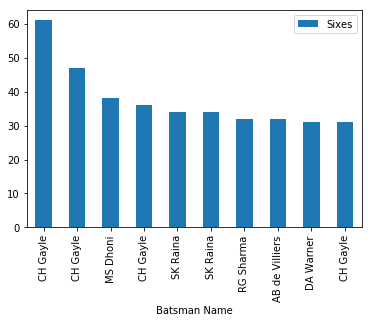

In [24]:
df = data.loc[data['batsman_runs'] == 6]
df = df.groupby(['batsman', 'bowling_team'])['batsman_runs'].count().reset_index()
df = df.rename(columns = {'batsman_runs':'Sixes', 'batsman':'Batsman Name', 'bowling_team':'Opposition Name'}).sort_values(by=['Sixes'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df = df.head(10)
print(df)
df.plot.bar( x = 'Batsman Name', y = ['Sixes', 'Opposition Name'])

# Best economy rate with maximum numbers of over's  bowled (Top 10)

       Bowler Name  Overs Bowled Economy Rate
0  Harbhajan Singh           530       7.0283
1         A Mishra           488      7.32787
2        PP Chawla           481      7.77963
3       SL Malinga           449      6.75724
4         R Ashwin           445      6.68539
5          P Kumar           439      7.61276
6         DJ Bravo           408      8.27206
7         UT Yadav           394      8.24619
8          B Kumar           390      7.12564
9        SP Narine           387      6.63824


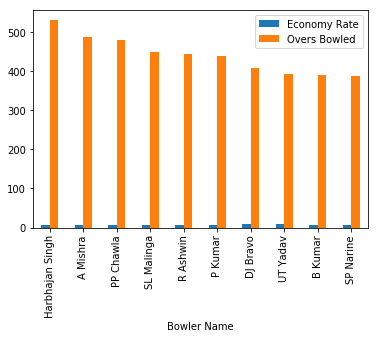

In [26]:
df = data
df = df.groupby(['bowler'])['ball'].count().apply(lambda x : x/6).astype(int).reset_index()
df = df.rename(columns = {'ball':'Overs Bowled', 'bowler':'Bowler Name'}).sort_values(by=['Overs Bowled'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df = df.head(10)
df["Economy Rate"] = ""

for i in range(len(df)):
    RunsGiven = data.loc[(data['bowler'] == df.loc[i, "Bowler Name"])]['total_runs'].sum()
    df.loc[i, 'Economy Rate'] = RunsGiven / df.loc[i, 'Overs Bowled']
    
df.sort_values(by = ['Economy Rate'], ascending = True)

df = df.head(10)
print(df)
df.plot.bar( x = 'Bowler Name', y = ['Economy Rate', 'Overs Bowled'])

#    # Most number of dots balls bowled by blowers with maximum over's bowled (Top 10)

       Bowler Name  Overs Bowled  Dott Deliveries
0  Harbhajan Singh           530             1130
1         A Mishra           488             1026
2        PP Chawla           481             1016
3       SL Malinga           449             1060
4         R Ashwin           445              967
5          P Kumar           439             1075
6         DJ Bravo           408              754
7         UT Yadav           394              855
8          B Kumar           390              953
9        SP Narine           387              948


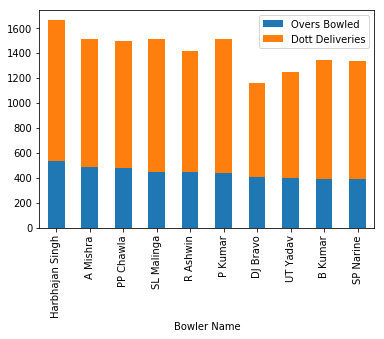

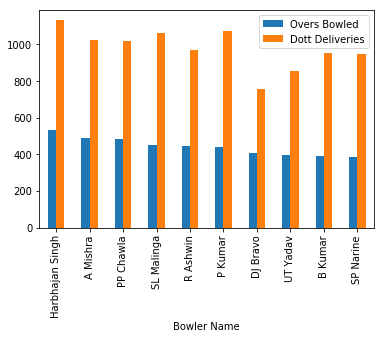

In [29]:
#df = data.loc[data['total_runs'] == 0]
df = data.groupby(['bowler'])['ball'].count().apply(lambda x : x/6).astype(int).reset_index()
#df = df.groupby(['bowler'])['total_runs'].count().reset_index()
df['Dott Deliveries'] = ''
df = df.rename(columns = {'ball':'Overs Bowled', 'bowler':'Bowler Name'}).sort_values(by=['Overs Bowled'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

for i in range(len(df)):
    df.loc[i, 'Dott Deliveries'] = data.loc[(data['bowler'] == df.loc[i, "Bowler Name"]) & (data['total_runs'] == 0)]['ball'].count()
    
df.sort_values(by =['Dott Deliveries'], ascending = True)
df = df.head(10)
print(df)
df.plot.bar(x = 'Bowler Name', stacked =  True)
df.plot.bar( x = 'Bowler Name', y = ['Overs Bowled','Dott Deliveries'])

# Overall performances of the team

                           Team  Runs Scored  Wickets Lost  Sixes Hit  \
0                Mumbai Indians        27026          1025        983   
1   Royal Challengers Bangalore        25839           952       1039   
2               Kings XI Punjab        25363          1007        866   
3         Kolkata Knight Riders        24828           934        789   
4              Delhi Daredevils        24388           951        801   
5           Chennai Super Kings        23819           765        886   
6              Rajasthan Royals        20146           789        615   
7           Sunrisers Hyderabad        14494           520        452   
8               Deccan Chargers        11463           484        400   
9                 Pune Warriors         6358           298        196   
10                Gujarat Lions         4862           188        155   
11       Rising Pune Supergiant         4533           158        157   
12         Kochi Tuskers Kerala         1901       

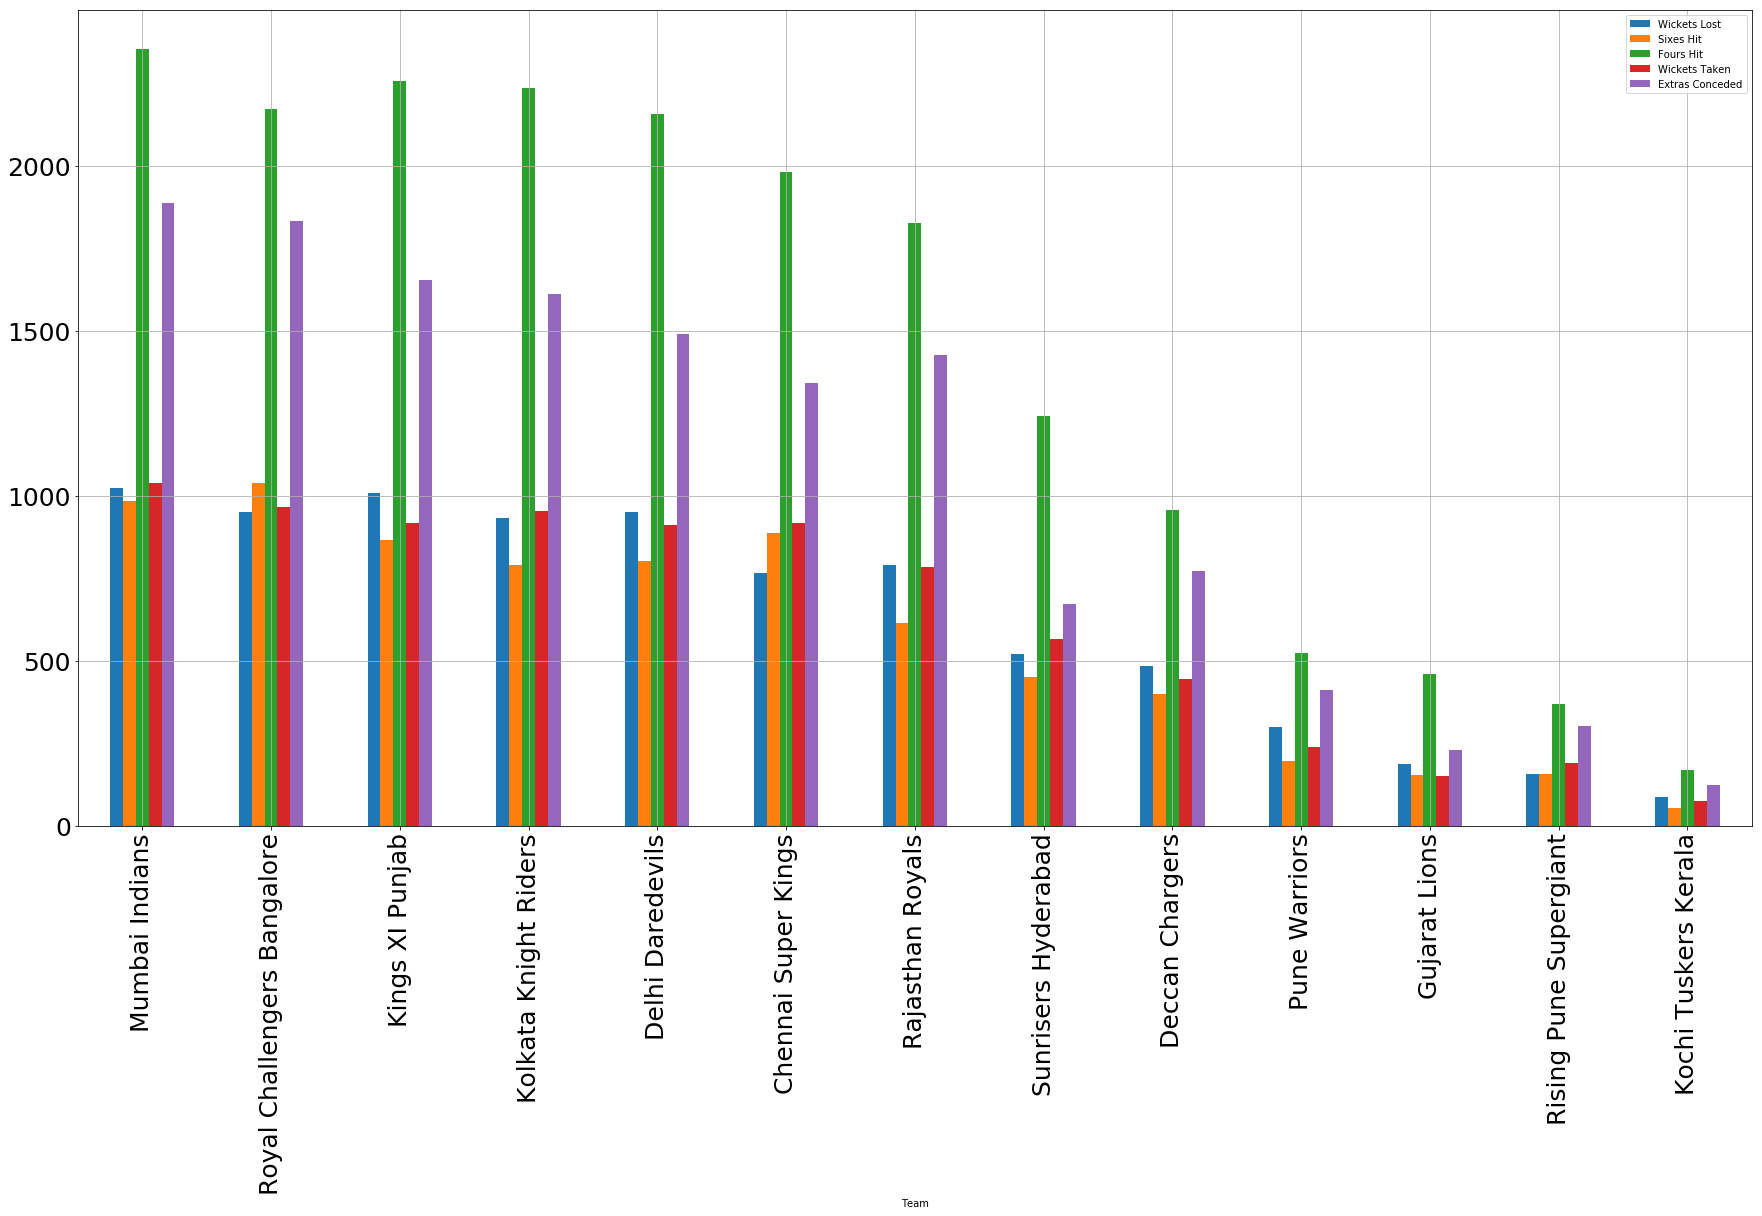

In [341]:
df = data.groupby(['batting_team'])['total_runs'].sum().reset_index()
df = df.rename(columns = {'total_runs':'Runs Scored', 'batting_team':'Team'}).sort_values(by=['Runs Scored'], ascending = False)
df["Wickets Lost"] = data['batting_team'].count()
df["Sixes Hit"] = ''
df["Fours Hit"] = ''
df["Super Overs Played"]  = ''
df["Wickets Taken"]  = ''
df["Extras Conceded"]  = ''

df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df

for i in range(len(df)):
    df.loc[i, 'Wickets Lost'] = data.loc[(data['batting_team'] == df.loc[i, "Team"]) & (data['player_dismissed'] != '')]['player_dismissed'].count()
    df.loc[i, 'Sixes Hit'] = data.loc[(data['batting_team'] == df.loc[i, "Team"]) & (data['batsman_runs'] == 6)]['batsman_runs'].count()
    df.loc[i, 'Fours Hit'] = data.loc[(data['batting_team'] == df.loc[i, "Team"]) & (data['batsman_runs'] == 4)]['batsman_runs'].count()
    df.loc[i, 'Super Overs Played'] = data.loc[(data['batting_team'] == df.loc[i, "Team"]) & (data['is_super_over'] == 1)]['match_id'].nunique()
    df.loc[i, 'Wickets Taken'] = data.loc[(data['bowling_team'] == df.loc[i, "Team"]) & (data['player_dismissed'] != '')]['player_dismissed'].count()
    
    wide_runs = data.loc[(data['bowling_team'] == df.loc[i, "Team"]) & (data['wide_runs'] != 0)]['wide_runs'].sum()
    bye_runs = data.loc[(data['bowling_team'] == df.loc[i, "Team"]) & (data['bye_runs'] != 0)]['bye_runs'].sum()
    legbye_runs = data.loc[(data['bowling_team'] == df.loc[i, "Team"]) & (data['wide_runs'] != 0)]['wide_runs'].sum()
    noball_runs = data.loc[(data['bowling_team'] == df.loc[i, "Team"]) & (data['noball_runs'] != 0)]['noball_runs'].sum()
    penalty_runs = data.loc[(data['bowling_team'] == df.loc[i, "Team"]) & (data['penalty_runs'] != 0)]['penalty_runs'].sum()

    df.loc[i, 'Extras Conceded'] = wide_runs + bye_runs + legbye_runs + noball_runs + penalty_runs

print(df)

df.plot.bar(x = 'Team', y = ['Wickets Lost', 'Sixes Hit', 'Fours Hit', 'Wickets Taken', 'Extras Conceded'],
z                      figsize = [30, 15], grid = True, fontsize = 25)

In [343]:
matchdata = pd.read_csv("E:\\PythonData\\Matches.csv")
print(matchdata.shape)
matchdata.head()

(696, 18)


id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

# Win loss ratio of IPL teams

                           Team  Matches Played  Wins  Losses  Tosses Won
0           Chennai Super Kings             147    90      57          77
1               Deccan Chargers              75    29      46          43
2              Delhi Daredevils             161    67      92          80
3                 Gujarat Lions              30    13      17          15
4               Kings XI Punjab             162    76      86          75
5          Kochi Tuskers Kerala              14     6       8           8
6         Kolkata Knight Riders             164    86      78          87
7                Mumbai Indians             171    98      73          90
8                 Pune Warriors              46    12      33          20
9              Rajasthan Royals             133    70      62          69
10       Rising Pune Supergiant              30    15      15           6
11  Royal Challengers Bangalore             166    79      85          77
12          Sunrisers Hyderabad       

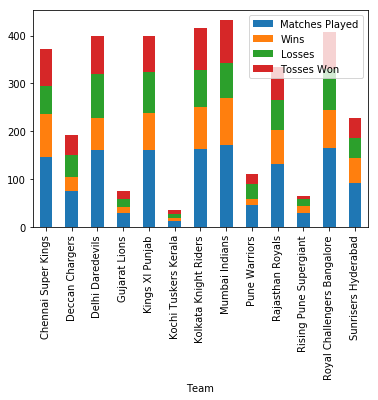

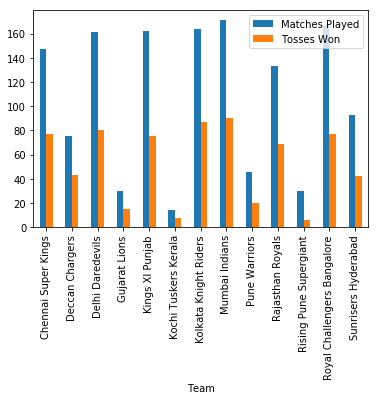

In [361]:
cleandata = pd.read_csv("E:\\PythonData\\Matches.csv")

cleandata["team1"] = np.where(cleandata['team1'] == 'Rising Pune Supergiants', 'Rising Pune Supergiant', cleandata['team1']) 
cleandata["team2"] = np.where(cleandata['team2'] == 'Rising Pune Supergiants', 'Rising Pune Supergiant', cleandata['team2']) 
cleandata["winner"] = np.where(cleandata['winner'] == 'Rising Pune Supergiants', 'Rising Pune Supergiant', cleandata['winner']) 

df = cleandata

df = df.groupby("team1").id.count().reset_index()
df = df.rename(columns = {'team1':'Team'}).sort_values(by=['Team'], ascending = True)
df["Matches Played"] = "" 
df["Wins"] = "" 
df["Losses"] = ""
df["Tosses Won"] = ""
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

df.Team
for i in range(len(df)):
    df.loc[i, "Matches Played"] = cleandata.loc[(cleandata['team1'] == df.loc[i, "Team"]) | (cleandata['team2'] == df.loc[i, "Team"])]['id'].count()
    df.loc[i, "Wins"]  = cleandata.loc[(cleandata['winner'] == df.loc[i, "Team"])]["winner"].count()
    df.loc[i, "Losses"] = cleandata.loc[(((cleandata['team1'] == df.loc[i, "Team"]) | (cleandata['team2'] == df.loc[i, "Team"])) & (cleandata['winner'] != df.loc[i, "Team"]))]['winner'].count()
    df.loc[i, "Tosses Won"] = cleandata.loc[(cleandata['toss_winner'] == df.loc[i, "Team"])]['toss_winner'].count()
    
df = df.drop(columns=['id'])
print(df)
df.plot.bar(x = 'Team', stacked=True)
df.plot.bar(x = 'Team',  y = ['Matches Played', 'Tosses Won'], stacked=False)

# Most man of the match award won by a player

                Player  MOM Won
0             CH Gayle       20
1       AB de Villiers       18
2            RG Sharma       16
3            YK Pathan       16
4            DA Warner       15
5             MS Dhoni       14
6             SK Raina       14
7            G Gambhir       13
8            SR Watson       13
9            AM Rahane       12
10          MEK Hussey       12
11            DR Smith       11
12             V Kohli       11
13            V Sehwag       11
14            A Mishra       10
15           JH Kallis       10
16           SP Narine        9
17            SE Marsh        9
18           AT Rayudu        9
19          KA Pollard        9
20           RA Jadeja        8
21        SR Tendulkar        8
22            UT Yadav        8
23          AD Russell        7
24          RV Uthappa        7
25        AC Gilchrist        7
26         Rashid Khan        6
27     Harbhajan Singh        6
28             A Nehra        6
29            BJ Hodge        6
..      

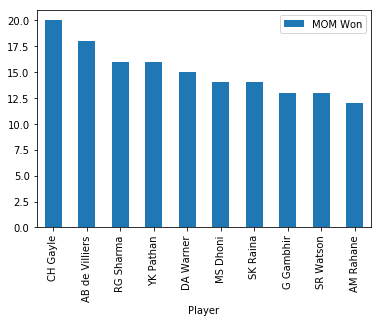

In [349]:
df = cleandata
df = df.groupby("player_of_match").id.count().reset_index()
df = df.rename(columns = {'player_of_match':'Player', 'id':'MOM Won'}).sort_values(by=['MOM Won'], ascending = False)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
print(df)
df = df.head(10)
df.plot.bar(x = 'Player', y = 'MOM Won')

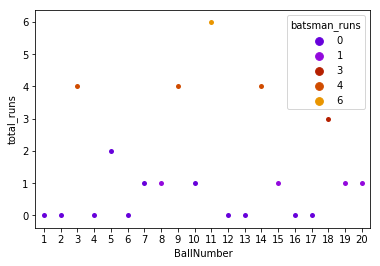

In [74]:
df = data
df['BallNumber'] = np.arange(start = 1, stop = len(df)+ 1)
df
sns.swarmplot(x="BallNumber", y="total_runs", hue="batsman_runs", palette="gnuplot", data=data.head(20))

In [70]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
df = data
df['BallCount'] = np.arange(start = 1, stop = len(df)+ 1)
sample = df.head(50)
source = ColumnDataSource(sample)
source
output_file('E:\\PythonData\\columndatasource_example.html')
p = figure()
p.circle(x = 'BallCount', y = 'total_runs',
         source = source,
         size = 10, color = 'green')

p.title.text = 'IPL deliveries analysis'
p.xaxis.axis_label = 'Ball Number'
p.yaxis.axis_label = 'Total runs scored'



hover = HoverTool()
hover.tooltips=[
    ('batsman', '@batsman'),
    ('bowler', '@bowler'),
    ('batsman_runs', '@batsman_runs'),
    ('wide', '@wide_runs'),
    ('bye', '@bye_runs'),
    ('legbye', '@legbye_runs'),
    ('noball_runs', '@noball_runs')
]

p.add_tools(hover)

show(p)